<a href="https://colab.research.google.com/github/KARGroup2/CPCS-324_Project/blob/main/Model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
#from keras.optimizers import SGD, Adam
from tensorflow.keras.optimizers import Adam,SGD 
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [3]:
path= "/content/drive/MyDrive/datasetTesting.csv"
data= pd.read_csv(path)
data.head()

,Images,City name,ZIP,Unnamed: 3,"Overlapping | A mistake by the author, but it has no effect | Mistakes I found in the images",Unnamed: 5,Final Labels
0,set_a/ae07_001.bmp,الشرايع,1251,ae07_001,LBL: ZIP:1251;AW1:الشرايع;AW2:aaA|laB|shM|raE|...,NaN,aaA|laB|shM|raE|aaA|yaB|ayE
1,set_a/ae07_002.bmp,دوّار.اللّواته,3077,ae07_002,LBL: ZIP:3077;AW1:دوّار.اللّواته;AW2:daA|waAll...,NaN,daA|waA11L|aaA|raA|aaA|laB|laM11L|waE|aaA|taB|teE
2,set_a/ae07_003.bmp,اللواتة,7041,ae07_003,LBL: ZIP:7041;AW1:اللواتة;AW2:aaA|laB|laM|waE|...,NaN,aaA|laB|laM|waE|aaA|taB|teE
3,set_a/ae07_004.bmp,القلعةالصّغرى,4021,ae07_004,LBL: ZIP:4021;AW1:القلعةالصّغرى;AW2:aaA|laB|ka...,NaN,aaA|laB|kaM|laM|ayM|teE|aaA|laB|saM11L|ghM|raE...
4,set_a/ae07_005.bmp,الدخّانية,6122,ae07_005,LBL: ZIP:6122;AW1:الدخّانية;AW2:aaA|laB|daE|kh...,NaN,aaA|laB|daE|khB11L|aaE|naB|yaM|teE


(119, 449)


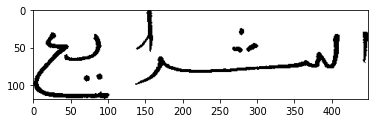

In [4]:
from PIL import Image
x= np.array(data['Images']) 
y= np.array(data['Final Labels']) 
image= Image.open("/content/drive/MyDrive/OurDataset/"+x[0])
plt.imshow(image)
image=np.array(image)
print(image.shape)

In [5]:
x_image=[]
#i=0
for impath in x:
  #image=Image.open("/content/drive/MyDrive/OurDataset/"+impath)
  #i=i+1
  im = Image.open("/content/drive/MyDrive/OurDataset/"+impath)
  #newImg= im.thumbnail((28,28))
  #newImg2=np.array(newImg)
  #print(newImg2)
  im2=im.resize((128,128))
  im3=np.array(im2)
  image3 = im3.astype('float32')
  #image3 /= 255  
  #plt.imshow(newImg2)
  #print(im2)
  
  #plt.imshow(newImg)
  x_image.append(image3)
  #print(im3)
  #newImg.save('image_400.jpg')
  #from google.colab.patches import cv2_imshow
  #cv2_imshow(newImg2)

In [6]:
print(x_image[0])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


aaA|laB|shM|raE|aaA|yaB|ayE


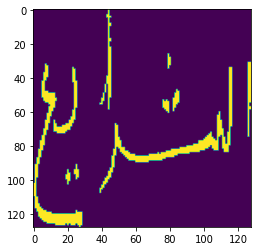

In [7]:
print(y[0])
plt.imshow(x_image[0])
#x_image= np.array(x_image)

In [8]:
x_image= np.array(x_image)
train_x, test_x, train_y, test_y = train_test_split(x_image, y, test_size = 0.2)

IMG_SIZE=128
train_x=np.array(train_x).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_x=np.array(test_x).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print(train_x.shape)
print(test_x.shape)

print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)
'''
print(x_image.shape)
x_train= x_image[0:500]
x_test=x_image[500:]
y_train= y[0:500]
y_test= y[500:]

print(x_train.shape)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))
'''

(429, 128, 128, 1)
(108, 128, 128, 1)
Train data shape:  (429, 128, 128, 1)
Test data shape:  (108, 128, 128, 1)


'\nprint(x_image.shape)\nx_train= x_image[0:500]\nx_test=x_image[500:]\ny_train= y[0:500]\ny_test= y[500:]\n\nprint(x_train.shape)\nprint(len(x_train))\nprint(len(x_test))\nprint(len(y_train))\nprint(len(y_test))\n'

In [9]:
'''
import tensorflow as tf 
#Normalizing
x_trainr = tf.keras.utils.normalize (train_x)
x_testr = tf.keras.utils.normalize (test_x)
#plt.imshow(x_trainr, cmap= plt.cm.binary)
'''

'\nimport tensorflow as tf \n#Normalizing\nx_trainr = tf.keras.utils.normalize (train_x)\nx_testr = tf.keras.utils.normalize (test_x)\n#plt.imshow(x_trainr, cmap= plt.cm.binary)\n'

In [11]:
#Resizing image
import numpy as np 
IMG_SIZE=128
x_trainr=np.array(train_x).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(test_x).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print(x_trainr.shape)
print(x_testr.shape)

(429, 128, 128, 1)
(108, 128, 128, 1)


In [12]:
print(train_y)

['daA|jaB|baM11L|teE' 'shB|waE11L|aaA|toA'
 'raA|aeA|seA|aaA|laB|dhE11L|raA|aaA|ayA' 'shB|maM11L|aaE|khA'
 'shB|maM11L|aaE|khA' 'amA|maA|aaA|laB|taM11L|maM|raE'
 'seB|waE|kaA|aaA|laB|seM11L|baM|taE' 'aaA|laB|ayM|baM11L|aaE|daA|aaA|taA'
 'haB|yaE|aaA|haMlaB|jaM|aaE|maA' 'taB|aaE|zaA|raA|keB|teE'
 'taB|laE11L|aaA|laB|ghM|zaE|aaElaB|naA'
 'seB|yaM|daE|yaA|aaA|laB|zaM11L|aaE|heB|raE' 'aeA|keB11L|waE|daA|teA'
 'amA|laB|naM11L|faM|yaM|deM|teE' 'aaA|laB|raE|deB11L|aaE|ayA'
 'raA|yaB|aaE|deA|baB|waE|heB|aaElaM|laA'
 'seB|yaM|daE|yaA|ahA|baB|raE|aaA|heB|yaM|maE|aaA|laB|zaE|heB|aaE|raA'
 'aaA|laB|faM|keM11L|teE' 'taB|waE|naB|seE|jaB|baM|aaE|raA|yaA'
 'taB|waE|naB|seE|aaA|laB|kaM|baM|aaE|deB|teE|aaA|aeElaB1|saB|laM|yaM12L|teE'
 'kaB|baM|aaE11LlaM|toA' 'baB|waE|ayB|thM|maM|aaE|naA'
 'seB|baM|ayM|teE|amA|baB|aaE|raA' 'maB|laM|yaM|shM|aaE|taA'
 'seB|waE|seB|teE|ahA|baB|naE|khB|laM|daE|waA|naA'
 'aaA|laB|raE|naB|aaE|kaB|yaM11L|teE|0A|2A|maB|aaE|raA|seA'
 'aaA|laB|maM|naM|saM|waE|raA|teA'
 'aaA|laB|ay

In [13]:
# Converting the labels to categorical values...

train_yOHE = to_categorical(train_y, num_classes = 9999, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 9999, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

ValueError: ignored

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(100,activation ="softmax"))

In [ ]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_trainr, train_yOHE, epochs=1,  validation_data = (x_testr,test_yOHE))


ValueError: ignored